In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Mobilities

In [2]:
def model(T, A, B):
    return A * np.exp(-B / (8.31 * T))

T_fcc = np.array([300, 1350])
M_fcc = np.array([2.12e-9, 3.05e-9])
# M_fcc = np.array([1.12e-14, 2.05e-14])

T_liq = np.array([300, 3000])
# M_liq = np.array([2.05e-9, 3.02e-8])
M_liq = np.array([2.05e-7, 3.02e-7])

params_FCC, covariance_FCC = curve_fit(model, T_fcc, M_fcc, p0=[1e-12, 1e4])
params_LIQ, covariance_LIQ = curve_fit(model, T_liq, M_liq, p0=[1e-9,  1e4])

A_FCC, B_FCC = params_FCC
A_LIQ, B_LIQ = params_LIQ

# Display the results
print(f"LIQUID:  A_LIQ, B_LIQ  = {A_LIQ:.2e}  {B_LIQ:.2f}")
print(f"FCC:     A_FCC, B_FCC  = {A_FCC:.2e}  {B_FCC:.2f}")

LIQUID:  A_LIQ, B_LIQ  = 3.15e-07  1073.15
FCC:     A_FCC, B_FCC  = 3.38e-09  1165.84


/tmp/ipykernel_50470/3925525129.py:12: OptimizeWarning: Covariance of the parameters could not be estimated
  params_FCC, covariance_FCC = curve_fit(model, T_fcc, M_fcc, p0=[1e-12, 1e4])
/tmp/ipykernel_50470/3925525129.py:2: RuntimeWarning: overflow encountered in exp
  return A * np.exp(-B / (8.31 * T))
/tmp/ipykernel_50470/3925525129.py:13: OptimizeWarning: Covariance of the parameters could not be estimated
  params_LIQ, covariance_LIQ = curve_fit(model, T_liq, M_liq, p0=[1e-9,  1e4])


In [5]:
T_LIQ = np.linspace(1350,2800,1650)
T_FCC = np.linspace(300,1320,1020)

factor = 1e-8

A_LIQ, B_LIQ  = 3.15e-07,  1073.15
A_FCC, B_FCC  = 3.38e-09,  1165.84
# A_LIQ, B_LIQ = 4.11e-07, 7691.94
# A_FCC, B_FCC = 2.44e-10, 1937.63

M_LIQ = factor*(A_LIQ*np.exp(-B_LIQ/(8.31*T_LIQ)))
M_FCC = factor*(A_FCC*np.exp(-B_FCC/(8.31*T_FCC)))

# factor = 8.58e-10
# M_LIQ = factor*(3.39e-06*np.exp(-3043/(8.31*T_LIQ)))
# M_FCC = factor*(2.03e-06*np.exp(-7501/(8.31*T_FCC)))

In [6]:
M_LIQ.max(), M_LIQ.min()

(np.float64(3.0080173390702426e-15), np.float64(2.8626377690532647e-15))

In [4]:
M_L = factor*(A_LIQ*np.exp(-B_LIQ/(8.31*1337)))
M_S = factor*(A_FCC*np.exp(-B_FCC/(8.31*1337)))

M_L / M_S

np.float64(93.97600753462623)

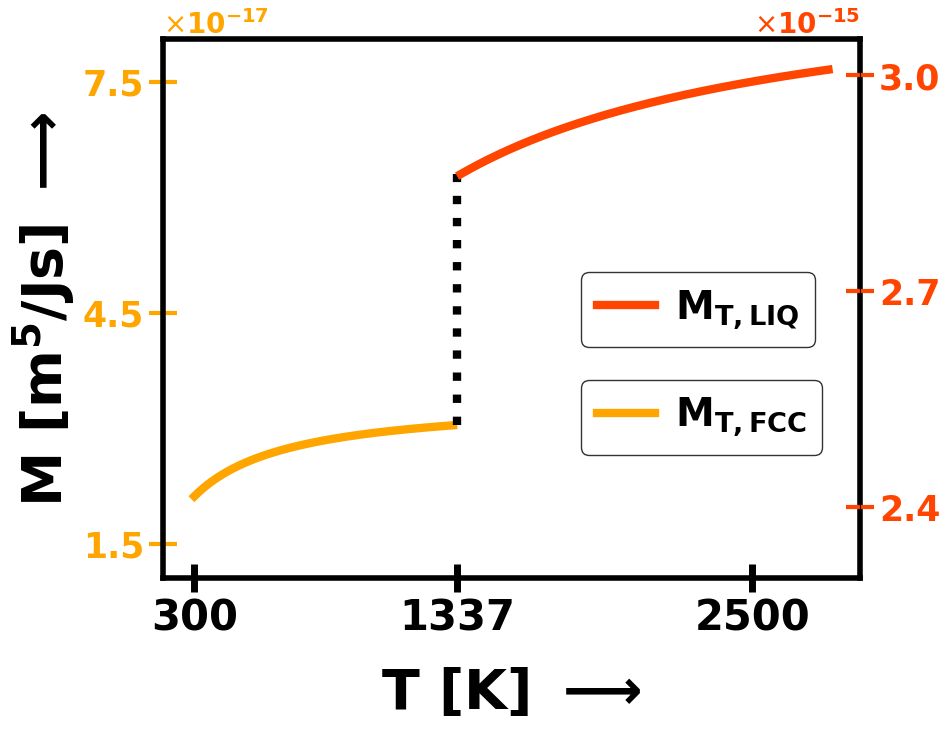

In [4]:
fig, ax1 = plt.subplots(1,1, figsize=(9,7), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.45, hspace=0.3)

l_FCC = ax1.plot(T_FCC, M_FCC, linestyle='-', color='orange', label='M$\mathbf{_{T, FCC}}$', linewidth=6)
ax1.set_ylabel(r'M $\mathbf{[m^5/J s]}$ $\mathbf{\longrightarrow}$', color='k', weight='bold', fontsize=40)
ax1.set_xlabel(r"T [K] $\mathbf{\longrightarrow}$", weight = 'bold', size=40, labelpad=20, color='k')
ax1.set_xticks([300, 1337, 2500, ], labels=['300', '1337', '2500', ], size=30, color='k', weight='bold')
ax1.set_yticks([1.5e-17, 4.5e-17, 7.5e-17], labels=[ r'1.5', r'4.5', r'7.5'], size=25, color='orange', rotation=0,  weight='bold')
ax1.set_ylim(1.05e-17, 8.05e-17)
ax1.tick_params(axis='x', direction='inout', which='both', length=20, width=5)
ax1.tick_params(axis='y', which='both', direction='inout', length=20, width=3, color='orange')
ax1.legend(loc=(0.6, 0.23), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'28',},  handletextpad=0.5, handlelength=1.5, edgecolor="black", facecolor='None', frameon=True)
ax1.set_title(r'$\times$10$\mathbf{^{-17}}$', pad=0, loc='left', color='orange', fontsize=20, weight='bold')
ax1.vlines(x=1337, ymin=M_FCC[-1], ymax=6.30e-17, linestyle=':', color='k', linewidth=6)


ax2 = ax1.twinx()
l_LIQ = ax2.plot(T_LIQ, M_LIQ, linestyle='-', color='orangered', label='M$\mathbf{_{T, LIQ}}$',linewidth = 6)
ax2.set_yticks([2.4e-15, 2.7e-15, 3.0e-15], labels=[ r'2.4', r'2.7', r'3.0'], size=25, color='orangered', rotation=0,  weight='bold')
ax2.set_ylim(2.3e-15, 3.05e-15)
ax2.tick_params(axis='y', which='both', direction='inout', length=20, width=3, color='orangered')
ax2.set_title(r'$\times$10$\mathbf{^{-15}}$', pad=0, loc='right', color='orangered', fontsize=20, weight='bold')
ax2.legend(loc=(0.6, 0.43), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'28',},  handletextpad=0.5, handlelength=1.5, edgecolor="black", facecolor='None', frameon=True)





ax1.spines[:].set_linewidth(4)


# plt.savefig('../../figures/mobilities.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/mobilities.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/mobilities.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/mobilities.jpg',bbox_inches='tight',)

plt.show()

# Viscosity

In [3]:
muT_LIQ = np.linspace(1350,2800,1650)
muT_FCC = np.linspace(300,1320,1020)

muA_LIQ, muA_FCC  = 9.33743418e-04, 3.11e-0 # https://link.springer.com/article/10.1007/s10765-016-2104-7
muB_LIQ, muB_FCC  = 2200, 0

MU_LIQ = muA_LIQ*np.exp(muB_LIQ/(muT_LIQ))
MU_FCC = muA_FCC*np.exp(muB_FCC/(muT_FCC))


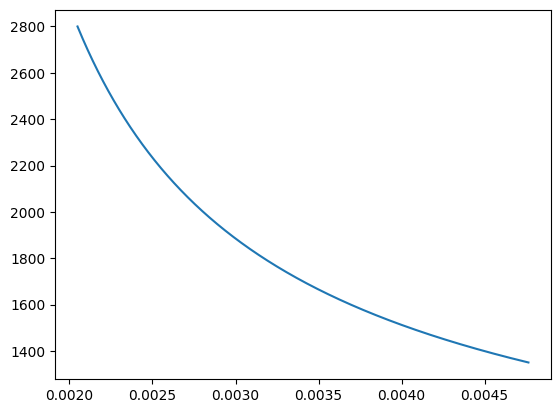

In [16]:
plt.plot(MU_LIQ, muT_LIQ)

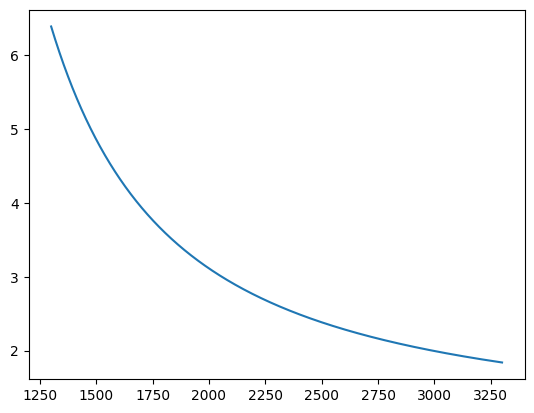

In [7]:
T = np.linspace(1300, 3300, 2001)
eta = np.exp(-0.1990+2669/T)

plt.plot(T, eta); plt.show()

# Specific Heat Capacity

# Density

# Thermal Conductivity

In [9]:
T_LIQ = np.linspace(1350,3000,1150)
T_FCC = np.linspace(300,1320,1020)

In [10]:
k_LIQ = 100+0.027397*T_LIQ
k_FCC = 338.91-0.0693*T_FCC

rho_LIQ = 19325.28-1.44*T_LIQ
rho_FCC = 19657.6-1.2*T_FCC

Sp_LIQ = 158+5.08e7*np.exp(-0.0114*T_LIQ)
Sp_FCC = 132-0.011*T_FCC+2.5e-5*T_FCC**2

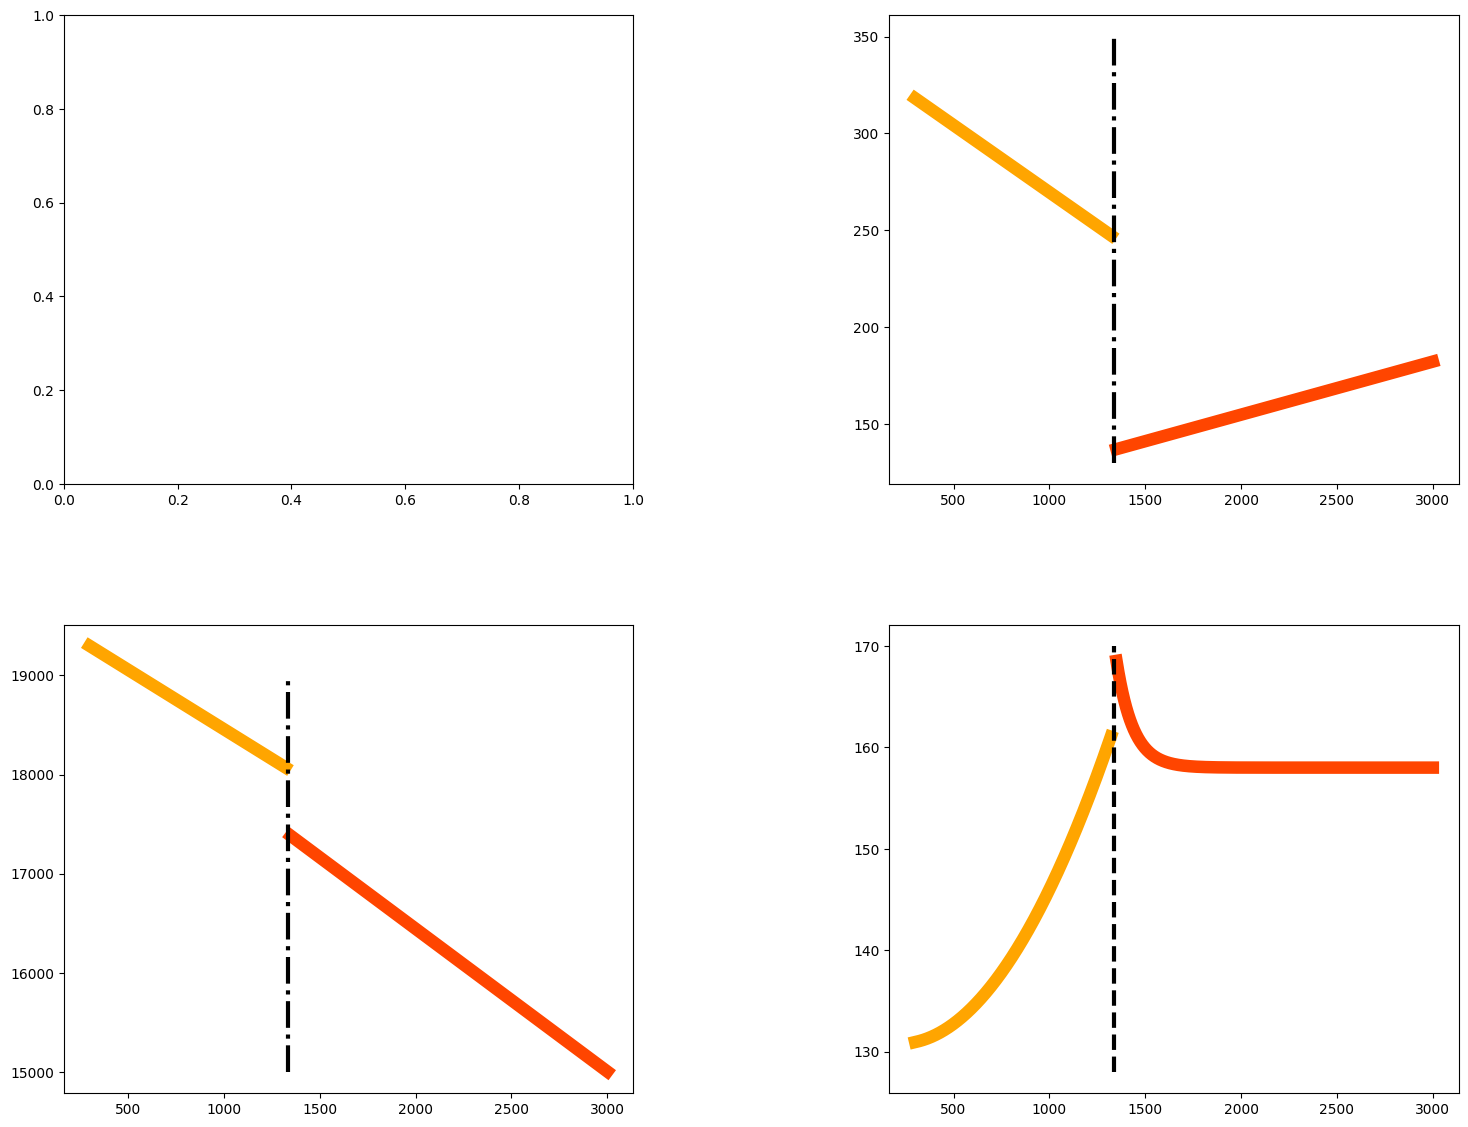

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(18, 14), nrows=2, ncols=2, frameon=False)
ax1.set_facecolor((0, 0, 0, 0))
ax2.set_facecolor((0, 0, 0, 0))
ax3.set_facecolor((0, 0, 0, 0))
ax4.set_facecolor((0, 0, 0, 0))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.45, hspace=0.3)

ax2.plot(T_LIQ, k_LIQ, '-', color='orangered', label='$\mathbf{k_{th, LIQ}}$', linewidth= 9)
ax2.plot(T_FCC, k_FCC, '-', color='orange', label='$\mathbf{k_{th, FCC}}$', linewidth = 9)
ax2.vlines(x=1337, ymin=130, ymax=350, linestyle='dashdot', linewidth=3, color='k')


ax3.plot(T_LIQ, rho_LIQ, '-', color='orangered', label=r'$\mathbf{\rho_{T, LIQ}}$', linewidth= 9)
ax3.plot(T_FCC, rho_FCC, '-', color='orange', label=r'$\mathbf{\rho_{T, FCC}}$', linewidth = 9)
ax3.vlines(x=1337, ymin=15000, ymax=19000, linestyle='dashdot', linewidth=3, color='k')


ax4.plot(T_LIQ, Sp_LIQ, '-', color='orangered', label=r'$\mathbf{C_{p, LIQ}}$', linewidth= 9)
ax4.plot(T_FCC, Sp_FCC, '-', color='orange', label=r'$\mathbf{C_{p, FCC}}$', linewidth = 9)
ax4.vlines(x=1337, ymin=128, ymax=170, linestyle='--', linewidth=3, color='k')


